In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
import csv
import datetime as dt
import numpy as np
import pandas_datareader as pdr

In [5]:
data=pd.read_csv('SOL-USD.csv',index_col=0,parse_dates=True)

In [6]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-10-16,163.007034,164.713715,156.737564,157.538818,157.538818,1531502795
2021-10-17,157.463562,167.425995,154.090347,159.743805,159.743805,2168838138
2021-10-18,159.997482,162.856277,155.030228,157.231277,157.231277,1698878759
2021-10-19,157.210205,159.405869,153.221008,156.017029,156.017029,1400902548
2021-10-20,155.883392,176.440674,155.199844,175.946869,175.946869,3315306825


In [8]:
exp1=data['Close'].ewm(span=12,adjust=False).mean()

In [10]:
exp2=data['Close'].ewm(span=26,adjust=False).mean()

In [12]:
data['MACD']=exp1-exp2
data['Signal Line']=data['MACD'].ewm(span=9,adjust=False).mean()

In [13]:
data['MACD']

Date
2021-10-16    0.000000
2021-10-17    0.175896
2021-10-18    0.111273
2021-10-19   -0.037489
2021-10-20    1.436231
                ...   
2022-10-12   -0.457881
2022-10-13   -0.569196
2022-10-14   -0.692767
2022-10-15   -0.816155
2022-10-16   -0.877855
Name: MACD, Length: 366, dtype: float64

In [14]:
data['Signal Line']

Date
2021-10-16    0.000000
2021-10-17    0.035179
2021-10-18    0.050398
2021-10-19    0.032821
2021-10-20    0.313503
                ...   
2022-10-12   -0.276872
2022-10-13   -0.335337
2022-10-14   -0.406823
2022-10-15   -0.488689
2022-10-16   -0.566523
Name: Signal Line, Length: 366, dtype: float64

In [18]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line
Date,,,,,,,,
2021-10-16,163.007034,164.713715,156.737564,157.538818,157.538818,1531502795,0.000000,0.000000
2021-10-17,157.463562,167.425995,154.090347,159.743805,159.743805,2168838138,0.175896,0.035179
2021-10-18,159.997482,162.856277,155.030228,157.231277,157.231277,1698878759,0.111273,0.050398
2021-10-19,157.210205,159.405869,153.221008,156.017029,156.017029,1400902548,-0.037489,0.032821
2021-10-20,155.883392,176.440674,155.199844,175.946869,175.946869,3315306825,1.436231,0.313503


<IPython.core.display.Javascript object>


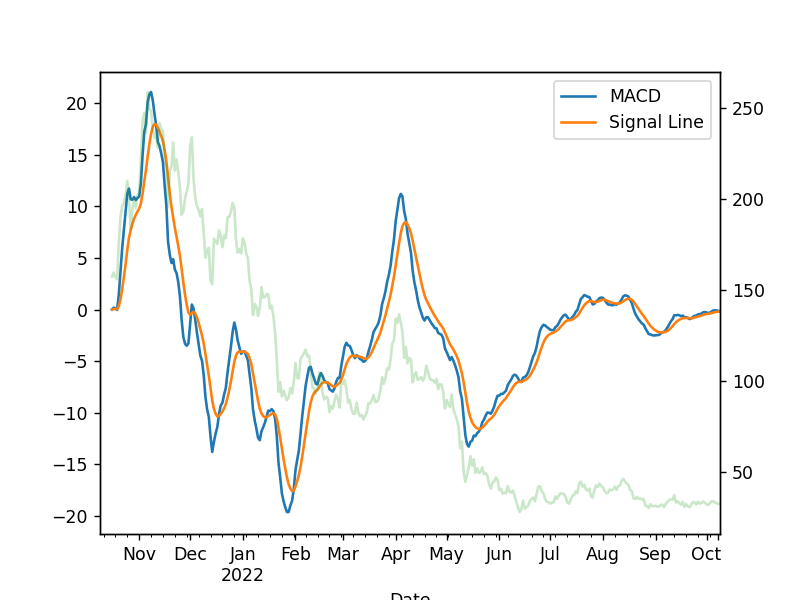

<AxesSubplot:>

In [22]:
fig,ax=plt.subplots()
data[['MACD','Signal Line']].plot(ax=ax)
data['Close'].plot(ax=ax,alpha=.25,secondary_y=True)

In [25]:
high14=data['Close'].rolling(14).max()
low14=data['Close'].rolling(14).min()
data['%K']=(data['Close']-low14)*100/(high14-low14)
data['%D']=data['%K'].rolling(3).mean()

In [26]:
data

,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line,%K,%D
Date,,,,,,,,,,
2021-10-16,163.007034,164.713715,156.737564,157.538818,157.538818,1531502795,0.000000,0.000000,NaN,NaN
2021-10-17,157.463562,167.425995,154.090347,159.743805,159.743805,2168838138,0.175896,0.035179,NaN,NaN
2021-10-18,159.997482,162.856277,155.030228,157.231277,157.231277,1698878759,0.111273,0.050398,NaN,NaN
2021-10-19,157.210205,159.405869,153.221008,156.017029,156.017029,1400902548,-0.037489,0.032821,NaN,NaN
2021-10-20,155.883392,176.440674,155.199844,175.946869,175.946869,3315306825,1.436231,0.313503,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-10-12,30.779692,31.460230,30.729170,31.165485,31.165485,490127096,-0.457881,-0.276872,11.615727,3.871909
2022-10-13,31.164413,31.181086,28.197371,30.544519,30.544519,1302451856,-0.569196,-0.335337,0.000000,3.871909
2022-10-14,30.542488,31.909657,29.759932,30.007418,30.007418,836283411,-0.692767,-0.406823,0.000000,3.871909


In [27]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line,%K,%D
Date,,,,,,,,,,
2022-10-12,30.779692,31.460230,30.729170,31.165485,31.165485,490127096,-0.457881,-0.276872,11.615727,3.871909
2022-10-13,31.164413,31.181086,28.197371,30.544519,30.544519,1302451856,-0.569196,-0.335337,0.000000,3.871909
2022-10-14,30.542488,31.909657,29.759932,30.007418,30.007418,836283411,-0.692767,-0.406823,0.000000,3.871909
2022-10-15,30.006132,30.151255,29.534006,29.575348,29.575348,547825492,-0.816155,-0.488689,0.000000,0.000000
2022-10-16,29.633522,29.995785,29.633522,29.897142,29.897142,569585408,-0.877855,-0.566523,7.076870,2.358957


<IPython.core.display.Javascript object>


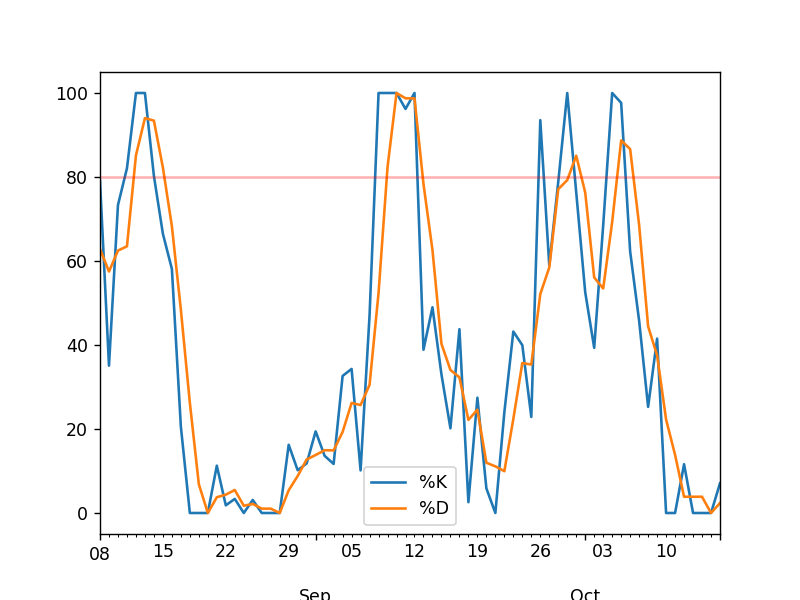

In [33]:
fig,ax=plt.subplots()
data[['%K','%D']].loc['2022-08-08':].plot(ax=ax)
ax.axhline(80,c='r',alpha=0.3)